In [247]:
import os
print(os.listdir("/content/"))

['.config', 'Bitcoin_Historical_Data.csv', '.ipynb_checkpoints', 'sample_data']


In [248]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns

#import os
#print(os.listdir("../input"))

from subprocess import check_output
import pandas as pd

# Đọc file CSV
data = pd.read_csv("/content/Bitcoin_Historical_Data.csv")

# Xem 5 dòng đầu tiên
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [249]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3669 non-null   object
 1   Price     3669 non-null   object
 2   Open      3669 non-null   object
 3   High      3669 non-null   object
 4   Low       3669 non-null   object
 5   Vol.      3669 non-null   object
 6   Change %  3669 non-null   object
dtypes: object(7)
memory usage: 200.8+ KB


In [250]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [251]:
# Volume/trades are a single event so fill na's with zeroes for relevant fields...
data['Date'].fillna(value=0, inplace=True)
data['Price'].fillna(value=0, inplace=True)
data['Vol.'].fillna(value=0, inplace=True)
data['Change %'].fillna(value=0, inplace=True)

# next we need to fix the OHLC (open high low close) data which is a continuous timeseries so
# lets fill forwards those values...
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)



data.head()

<ipython-input-251-50f9ae3101ba>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-251-50f9ae3101ba>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,"Aug 01, 2020","11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,"Jul 31, 2020","11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,"Jul 30, 2020","11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,"Jul 29, 2020","11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [252]:
import pandas as pd
import datetime
import pytz

# Giả sử bạn đã có DataFrame 'data'
# data = pd.read_csv("file.csv")

# Chuyển cột 'Date' về dạng datetime nếu chưa phải
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'] = data['Date'].dt.tz_localize('UTC', ambiguous='NaT', nonexistent='NaT')


# Kiểm tra có giá trị NaT (giá trị lỗi khi chuyển đổi) không
if data['Date'].isna().sum() > 0:
    print("⚠️ Cảnh báo: Có giá trị không thể chuyển sang datetime!")

# Tạo khoảng thời gian hợp lệ
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)

# Lọc dữ liệu trong khoảng thời gian hợp lệ
filtered_data = data[(data['Date'] >= start) & (data['Date'] <= end)]

# Lấy hàng đầu tiên của mỗi tuần (bắt đầu từ thứ Hai)
weekly_rows = filtered_data.groupby(pd.Grouper(key='Date', freq='W-MON')).first().reset_index()

# Xem kết quả
print(weekly_rows.head())


                       Date  Price   Open   High    Low    Vol. Change %
0 2015-01-05 00:00:00+00:00  314.9  318.2  321.4  313.5  12.82K   -1.05%
1 2015-01-12 00:00:00+00:00  282.3  274.8  285.1  271.5  21.94K    2.70%
2 2015-01-19 00:00:00+00:00  221.3  269.3  269.1  217.1  95.50K  -17.84%
3 2015-01-26 00:00:00+00:00  210.6  215.9  216.6  203.4  37.48K   -2.46%
4 2015-02-02 00:00:00+00:00  263.3  269.2  276.9  247.3  50.26K   -2.20%


In [253]:
print(weekly_rows.head())  # In 5 dòng đầu
print(weekly_rows.isnull().sum())  # Kiểm tra cột nào có giá trị NaN
weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date'])
import pandas as pd

# Kiểm tra dữ liệu Date trước khi chuyển đổi
print(weekly_rows['Date'].head())
print(weekly_rows['Date'].dtype)

# Chuyển đổi Date từ timestamp sang datetime
if weekly_rows['Date'].dtype == 'int64':
    weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date'], unit='s')  # Hoặc 'ms' nếu cần

# Kiểm tra lại
print(weekly_rows['Date'].dtype)
print(weekly_rows.head())



                       Date  Price   Open   High    Low    Vol. Change %
0 2015-01-05 00:00:00+00:00  314.9  318.2  321.4  313.5  12.82K   -1.05%
1 2015-01-12 00:00:00+00:00  282.3  274.8  285.1  271.5  21.94K    2.70%
2 2015-01-19 00:00:00+00:00  221.3  269.3  269.1  217.1  95.50K  -17.84%
3 2015-01-26 00:00:00+00:00  210.6  215.9  216.6  203.4  37.48K   -2.46%
4 2015-02-02 00:00:00+00:00  263.3  269.2  276.9  247.3  50.26K   -2.20%
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
0   2015-01-05 00:00:00+00:00
1   2015-01-12 00:00:00+00:00
2   2015-01-19 00:00:00+00:00
3   2015-01-26 00:00:00+00:00
4   2015-02-02 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]
datetime64[ns, UTC]
                       Date  Price   Open   High    Low    Vol. Change %
0 2015-01-05 00:00:00+00:00  314.9  318.2  321.4  313.5  12.82K   -1.05%
1 2015-01-12 00:00:00+00:00  282.3  274.8  285.1  271.5  21.94K    2.70%
2 2

In [254]:


# Kiểm tra lại kiểu dữ liệu
print(weekly_rows.dtypes)
print(weekly_rows.dtypes)
print(weekly_rows.head())

Date        datetime64[ns, UTC]
Price                    object
Open                     object
High                     object
Low                      object
Vol.                     object
Change %                 object
dtype: object
Date        datetime64[ns, UTC]
Price                    object
Open                     object
High                     object
Low                      object
Vol.                     object
Change %                 object
dtype: object
                       Date  Price   Open   High    Low    Vol. Change %
0 2015-01-05 00:00:00+00:00  314.9  318.2  321.4  313.5  12.82K   -1.05%
1 2015-01-12 00:00:00+00:00  282.3  274.8  285.1  271.5  21.94K    2.70%
2 2015-01-19 00:00:00+00:00  221.3  269.3  269.1  217.1  95.50K  -17.84%
3 2015-01-26 00:00:00+00:00  210.6  215.9  216.6  203.4  37.48K   -2.46%
4 2015-02-02 00:00:00+00:00  263.3  269.2  276.9  247.3  50.26K   -2.20%


In [255]:
import plotly.graph_objects as go
import plotly.io as pio

# Chọn renderer phù hợp với Colab
pio.renderers.default = "colab"

# Tạo Figure thay vì dùng dict
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_rows['Date'], y=weekly_rows['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=weekly_rows['Date'], y=weekly_rows['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=weekly_rows['Date'], y=weekly_rows['Price'], mode='lines', name='Price'))

# Thêm layout
fig.update_layout(
    title='Historical Bitcoin Prices (2015-2018) with the Slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ]
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

# Hiển thị trong Colab
fig.show()


In [256]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Chọn renderer cho Colab
pio.renderers.default = "colab"

# Kiểm tra kiểu dữ liệu và xử lý nếu cần
weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date']).dt.tz_localize(None)

# Xóa giá trị NaN nếu có
weekly_rows = weekly_rows.dropna()

# Hàm chuyển đổi '12.82K' -> 12820.0, '15.4M' -> 15400000.0
def convert_volume(value):
    if isinstance(value, str):  # Nếu là chuỗi thì xử lý
        multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9}
        if value[-1] in multipliers:
            return float(value[:-1]) * multipliers[value[-1]]
        return float(value)  # Nếu không có ký tự K/M/B thì giữ nguyên
    return value  # Nếu đã là số thì giữ nguyên

# Chuyển đổi cột 'Vol.'
weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)

# Tạo biểu đồ
trace1 = go.Scatter(
    x=weekly_rows['Date'],
    y=weekly_rows['Vol.'],  # Đã chuyển thành số thực
    mode='lines',
    name='Bitcoin Volume (USD)'
)

layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=12, label='1y', step='month', stepmode='backward'),
                dict(count=36, label='3y', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

fig = go.Figure(data=[trace1], layout=layout)

# Hiển thị biểu đồ
fig.show()


In [257]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Chọn renderer cho Colab
pio.renderers.default = "colab"

# Kiểm tra kiểu dữ liệu và xử lý nếu cần
weekly_rows['Price'] = pd.to_numeric(weekly_rows['Price'], errors='coerce')
weekly_rows['Vol.'] = pd.to_numeric(weekly_rows['Vol.'], errors='coerce')

# Xóa giá trị NaN nếu có
weekly_rows = weekly_rows.dropna()

# Vẽ biểu đồ
trace = go.Scattergl(
    x=weekly_rows['Price'],  # Giá Bitcoin
    y=weekly_rows['Vol.'],   # Khối lượng giao dịch
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

layout = go.Layout(
    title='BTC Volume vs USD',
    xaxis=dict(
        title='Bitcoin Price (USD)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume (BTC)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=[trace], layout=layout)

# Hiển thị biểu đồ
fig.show()


In [258]:
print(weekly_rows.dtypes)
print("Số lượng dữ liệu train:", len(data_train))
print("Số lượng dữ liệu test:", len(data_test))
print(data_train.head())

Date        datetime64[ns]
Price              float64
Open                object
High                object
Low                 object
Vol.               float64
Change %            object
dtype: object
Số lượng dữ liệu train: 109
Số lượng dữ liệu test: 0
Date
2015-01-05    314.9
2015-01-12    282.3
2015-01-19    221.3
2015-01-26    210.6
2015-02-02    263.3
Name: Price, dtype: float64


In [262]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Chuyển 'Date' thành kiểu datetime và đặt làm index
# weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date'])
weekly_rows.set_index('Date', inplace=True)

# Kiểm tra kiểu index
print("Weekly_rows index type:", type(weekly_rows.index))

# Chia dữ liệu thành tập train và test
split_date = '2018-06-25'
data_train = weekly_rows.loc[weekly_rows.index <= split_date, 'Price'].copy()
data_test = weekly_rows.loc[weekly_rows.index > split_date, 'Price'].copy()

# Chuyển dữ liệu thành numpy array
training_set = data_train.values.reshape(-1, 1)
#
# Chuẩn hóa dữ liệu với MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

# Tạo tập X_train và y_train
X_train = training_set_scaled[:-1]
y_train = training_set_scaled[1:]

# Định dạng lại dữ liệu để phù hợp với LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (len(X_train), 1, 1))

# Kiểm tra dữ liệu đầu ra
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Weekly_rows index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
X_train shape: (108, 1, 1)
y_train shape: (108, 1)


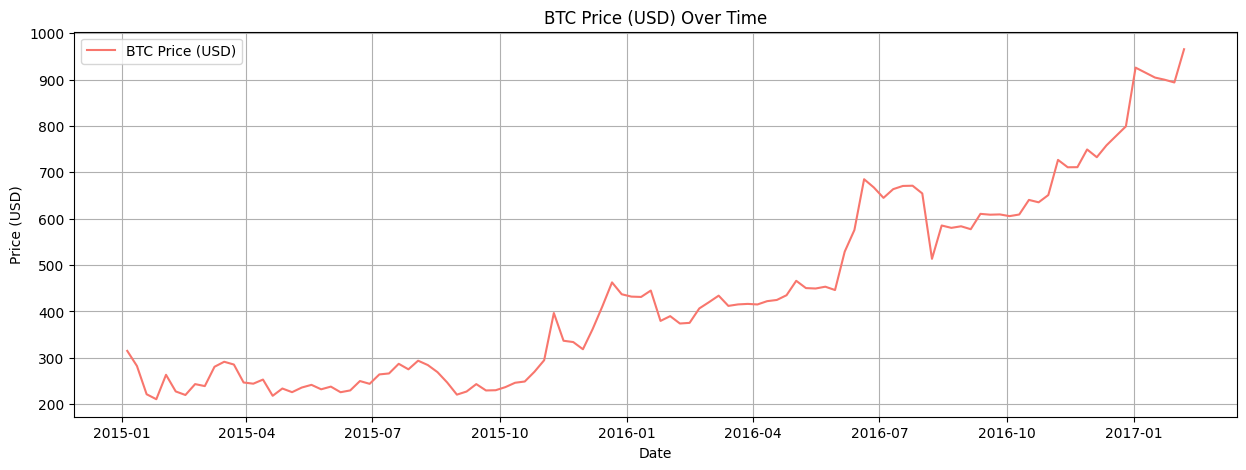

In [263]:
import matplotlib.pyplot as plt

# # Chuyển 'Date' thành kiểu datetime và đặt làm index nếu chưa làm
# weekly_rows['Date'] = pd.to_datetime(weekly_rows['Date'])
# weekly_rows.set_index('Date', inplace=True)

# Danh sách màu sắc
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

# Vẽ biểu đồ giá Bitcoin theo thời gian
plt.figure(figsize=(15, 5))
plt.plot(weekly_rows.index, weekly_rows['Price'], color=color_pal[0], label='BTC Price (USD)')

# Định dạng đồ thị
plt.title('BTC Price (USD) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [261]:
print(weekly_rows.dtypes)


Date        datetime64[ns]
Price              float64
Open                object
High                object
Low                 object
Vol.               float64
Change %            object
dtype: object
